In [1]:
%cd ..

/home/dawood/Workspace/pose-estimation


In [2]:
import torch
from data.coco import COCO
from models.openpose import Openpose

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data = COCO('/home/dawood/Datasets/MSCOCO/val2017/', '/home/dawood/Datasets/MSCOCO/annotations/person_keypoints_val2017.json', augment=True)

model = Openpose()
model = model.eval()
model = model.cuda()

loading annotations into memory...
Done (t=0.25s)
creating index...
index created!


In [4]:
img, hm_gt, jm_gt, mask = data[979]

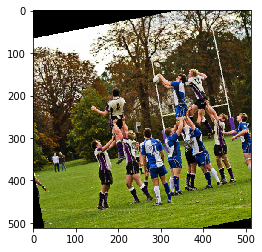

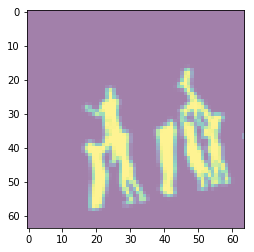

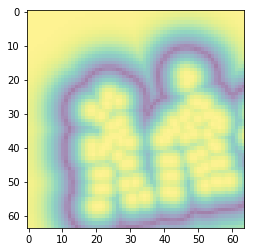

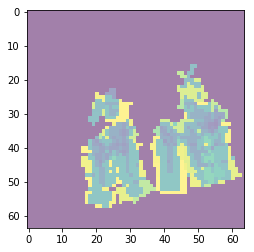

In [5]:
plt.imshow(img.permute(1,2,0).contiguous().numpy())
plt.figure()
plt.imshow(mask.numpy(), alpha=0.5)
plt.figure()
plt.imshow(hm_gt.max(0)[0].numpy(), alpha=0.5)
plt.figure()
plt.imshow(abs(jm_gt[18:]).max(0)[0].numpy(), alpha=0.5)

In [6]:
preds = model(img.unsqueeze(0).cuda())

In [7]:
loss = Openpose.calc_loss(preds, hm_gt, jm_gt, mask)
print(loss)

tensor(35644.6172)
